In [1]:
# Import PySpark
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, substring, max
from pyspark.sql import functions as F
from functools import reduce
from pyspark.sql.types import IntegerType, FloatType


import os
import matplotlib.pyplot as plt

In [2]:
#SparkSession  
spark = SparkSession.builder \
    .appName("PySpark-Andiez") \
    .getOrCreate()

24/10/20 15:02:39 WARN Utils: Your hostname, Banh-Bao-Chien-3.local resolves to a loopback address: 127.0.0.1; using 192.168.1.36 instead (on interface en0)
24/10/20 15:02:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/20 15:02:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Test the setup

data = [("Alice", 25), ("Bob", 30), ("Andiez", 20)]
df = spark.createDataFrame(data, ["Name", "Age"])
df.show()

+------+---+
|  Name|Age|
+------+---+
| Alice| 25|
|   Bob| 30|
|Andiez| 20|
+------+---+



In [4]:
#Read data frame
path = '/Users/andiez/Desktop/NEU/CNHĐ CNTT/data/'
dataframe = spark.read.csv(path + 'sales2019_1.csv', header=True, escape="\"")
dataframe.show(5)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  141234|              iPhone|               1|       700|01/22/19 21:25|944 Walnut St, Bo...|
|  141235|Lightning Chargin...|               1|     14.95|01/28/19 14:15|185 Maple St, Por...|
|  141236|    Wired Headphones|               2|     11.99|01/17/19 13:33|538 Adams St, San...|
|  141237|    27in FHD Monitor|               1|    149.99|01/05/19 20:33|738 10th St, Los ...|
|  141238|    Wired Headphones|               1|     11.99|01/25/19 11:59|387 10th St, Aust...|
+--------+--------------------+----------------+----------+--------------+--------------------+
only showing top 5 rows



In [5]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = spark.read.csv(filepath, header=True, escape="\"")
        frames.append(df1)

merged_df = reduce(DataFrame.union, frames)
merged_df.show()

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  162009|              iPhone|               1|       700|03/28/19 20:59|942 Church St, Au...|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St, San ...|
|  162011|34in Ultrawide Mo...|               1|    379.99|03/10/19 00:01|764 13th St, San ...|
|  162012|AA Batteries (4-p...|               1|      3.84|03/20/19 21:33|187 Ridge St, San...|
|  162013|34in Ultrawide Mo...|               1|    379.99|03/15/19 23:05|904 Main St, Aust...|
|  162014|USB-C Charging Cable|         

In [6]:
#Check dataframe has been merged or not
row_count = merged_df.count()
print(f"Number of rows: {row_count}")

Number of rows: 186850


In [7]:
df = merged_df
df.coalesce(1).write.csv(path, header=True, mode="append")

### Add "Month" column


In [8]:
df = df.withColumn('Month', substring(col('Order Date'), 1, 2))
df.show()

+--------+--------------------+----------------+----------+--------------+--------------------+-----+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|Month|
+--------+--------------------+----------------+----------+--------------+--------------------+-----+
|  162009|              iPhone|               1|       700|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...|   03|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St, San ...|   03|
|  162011|34in Ultrawide Mo...|               1|    379.99|03/10/19 00:01|764 13th St, San ...|   03|
|  162012|AA Batteries (4-p...|               1|      3.84|03/20/19 21:33|187 Ridge St, San...|   03|
|  162013|34in Ultrawide Mo...|               1|    379.99|03/15/19 23:05|904 Main

In [9]:
filtered_df = df.filter(col('Month') == "Or")
filtered_df.show()

+--------+-------+----------------+----------+----------+----------------+-----+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|Month|
+--------+-------+----------------+----------+----------+----------------+-----+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|   Or|
|Order ID|Product|Quantity O

In [27]:
# Get unique values from the 'Month' column
unique_months = df.select('Month').distinct().collect()
# Print the unique values
unique_months_set = {row['Month'] for row in unique_months}
print(unique_months_set)

{'06', '11', '10', '07', '08', '02', '12', '01', '05', '09', '04', '03'}


In [11]:
# Drop rows where all elements are null
df = df.na.drop(how='all')

# Filter out rows where 'Month' is 'Or'
df = df.filter(col('Month') != 'Or')


# 3. Reporting

### 3.1. What was the best month for sales? How much was earn that month?

In [12]:
# Cast 'Quantity Ordered' to IntegerType
df = df.withColumn('Quantity Ordered', col('Quantity Ordered').cast('integer'))

# Cast 'Price Each' to FloatType
df = df.withColumn('Price Each', col('Price Each').cast('float'))

In [13]:
# Show the result
df.printSchema()  # Optional: Check the data types of the columns
df.show()

root
 |-- Order ID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: float (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)
 |-- Month: string (nullable = true)

+--------+--------------------+----------------+----------+--------------+--------------------+-----+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|Month|
+--------+--------------------+----------------+----------+--------------+--------------------+-----+
|  162009|              iPhone|               1|     700.0|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...|   03|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St,

In [14]:
# Create a new column 'Sales' by multiplying 'Quantity Ordered' and 'Price Each'
df = df.withColumn('Sales', col('Quantity Ordered') * col('Price Each'))
df.show()

+--------+--------------------+----------------+----------+--------------+--------------------+-----+------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|Month| Sales|
+--------+--------------------+----------------+----------+--------------+--------------------+-----+------+
|  162009|              iPhone|               1|     700.0|03/28/19 20:59|942 Church St, Au...|   03| 700.0|
|  162009|Lightning Chargin...|               1|     14.95|03/28/19 20:59|942 Church St, Au...|   03| 14.95|
|  162009|    Wired Headphones|               2|     11.99|03/28/19 20:59|942 Church St, Au...|   03| 23.98|
|  162010|Bose SoundSport H...|               1|     99.99|03/17/19 05:39|261 10th St, San ...|   03| 99.99|
|  162011|34in Ultrawide Mo...|               1|    379.99|03/10/19 00:01|764 13th St, San ...|   03|379.99|
|  162012|AA Batteries (4-p...|               1|      3.84|03/20/19 21:33|187 Ridge St, San...|   03|  3.84|
|  162013|34in Ultr

In [15]:
# Get the current list of columns
columns = df.columns

# Remove 'Sales' from the current list
moving_column = 'Sales'
columns.remove(moving_column)

# Create a new list of columns with 'Sales' moved to the 4th position (index 3)
new_columns = columns[:3] + [moving_column] + columns[3:]

# Select the DataFrame with the new column order
df = df.select(new_columns)

# Show the result
df.show()

+--------+--------------------+----------------+------+----------+--------------+--------------------+-----+
|Order ID|             Product|Quantity Ordered| Sales|Price Each|    Order Date|    Purchase Address|Month|
+--------+--------------------+----------------+------+----------+--------------+--------------------+-----+
|  162009|              iPhone|               1| 700.0|     700.0|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|Lightning Chargin...|               1| 14.95|     14.95|03/28/19 20:59|942 Church St, Au...|   03|
|  162009|    Wired Headphones|               2| 23.98|     11.99|03/28/19 20:59|942 Church St, Au...|   03|
|  162010|Bose SoundSport H...|               1| 99.99|     99.99|03/17/19 05:39|261 10th St, San ...|   03|
|  162011|34in Ultrawide Mo...|               1|379.99|    379.99|03/10/19 00:01|764 13th St, San ...|   03|
|  162012|AA Batteries (4-p...|               1|  3.84|      3.84|03/20/19 21:33|187 Ridge St, San...|   03|
|  162013|34in Ultr

In [16]:

# Group by 'Month' and calculate the sum of 'Sales'
sales_value = df.groupBy('Month').sum('Sales')

# Show the result
sales_value.show()

+-----+------------------+
|Month|        sum(Sales)|
+-----+------------------+
|   03|2807100.3656582832|
|   04|3390670.2231714725|
|   02| 2202022.408319235|
|   01|1822256.7213459015|
|   05|3152606.7349271774|
|   06| 2577802.247295618|
|   12|  4613443.31607008|
|   11| 3199603.184257984|
|   10| 3736726.860444069|
|   07|2647775.7468385696|
|   08|2244467.8685896397|
|   09|2097560.1194250584|
+-----+------------------+



In [17]:
# Find the maximum value in the 'sum(Sales)' column
max_sales_value = sales_value.agg(max('sum(Sales)').alias('Max Sales Value'))

# Show the result
max_sales_value.show()

+----------------+
| Max Sales Value|
+----------------+
|4613443.31607008|
+----------------+



The error TypeError: 'Column' object is not callable occurs because in PySpark, sales_value is a DataFrame (or a column within a DataFrame), not a simple array or list that can be directly used in matplotlib. To plot the data using matplotlib, you need to extract the data from the PySpark DataFrame into a Python list or pandas DataFrame.


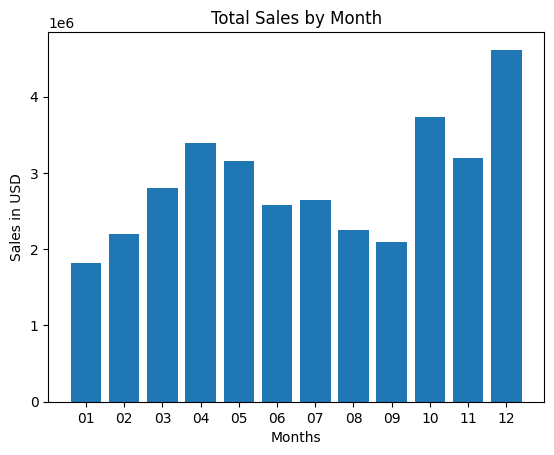

In [18]:
# Collect the data from PySpark DataFrame
sales_data = sales_value.select('Month', 'sum(Sales)').orderBy('Month').collect()

# Extract months and sales into lists
months = [row['Month'] for row in sales_data]
sales = [row['sum(Sales)'] for row in sales_data]

# Plot the data using matplotlib
plt.bar(x=months, height=sales)
plt.xticks(months)  # Set x-axis labels
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.title('Total Sales by Month')
plt.show()

### 3.2. What city has the best sales

In [19]:
# Assuming df is your PySpark DataFrame and 'Purchase Address' is the column
df = df.withColumn('City', F.split(df['Purchase Address'], ',')[1])

# Show the result
df.show()

+--------+--------------------+----------------+------+----------+--------------+--------------------+-----+--------------+
|Order ID|             Product|Quantity Ordered| Sales|Price Each|    Order Date|    Purchase Address|Month|          City|
+--------+--------------------+----------------+------+----------+--------------+--------------------+-----+--------------+
|  162009|              iPhone|               1| 700.0|     700.0|03/28/19 20:59|942 Church St, Au...|   03|        Austin|
|  162009|Lightning Chargin...|               1| 14.95|     14.95|03/28/19 20:59|942 Church St, Au...|   03|        Austin|
|  162009|    Wired Headphones|               2| 23.98|     11.99|03/28/19 20:59|942 Church St, Au...|   03|        Austin|
|  162010|Bose SoundSport H...|               1| 99.99|     99.99|03/17/19 05:39|261 10th St, San ...|   03| San Francisco|
|  162011|34in Ultrawide Mo...|               1|379.99|    379.99|03/10/19 00:01|764 13th St, San ...|   03| San Francisco|
|  16201

In [20]:
# Group by 'City' and sum the 'Sales' column
sales_value_city = df.groupBy('City').agg(F.sum('Sales').alias('Total_Sales'))

# Show the result
sales_value_city.show()

+--------------+------------------+
|          City|       Total_Sales|
+--------------+------------------+
|      Portland|2320490.5985319614|
|       Atlanta| 2795498.565934658|
|        Dallas| 2767975.385901928|
|        Boston|3661641.9913027287|
|        Austin|1819581.7407691479|
|   Los Angeles| 5452570.772869825|
| New York City| 4664317.406611681|
| San Francisco| 8262203.869155407|
|       Seattle| 2747755.465265751|
+--------------+------------------+



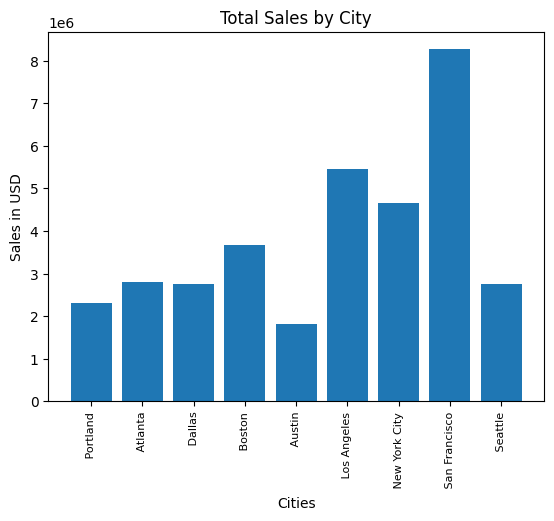

In [21]:
# Collect the PySpark DataFrame into a list of Row objects
sales_value_city_list = sales_value_city.collect()

# Extract cities and sales values from the list
cities = [row['City'] for row in sales_value_city_list]
sales = [row['Total_Sales'] for row in sales_value_city_list]

plt.bar(x=cities, height=sales)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title('Total Sales by City')
plt.show()

### 3.3. What time should we display ads to maximize the likelihood of customer’s buying product?

In [22]:
# Convert the 'Order Date' column to a timestamp
df = df.withColumn('Order Date', F.to_timestamp('Order Date', 'MM/dd/yy HH:mm'))

# # Extract the hour from the 'Order Date' column
df = df.withColumn('Hours', F.hour('Order Date'))
df.show()

+--------+--------------------+----------------+------+----------+-------------------+--------------------+-----+--------------+-----+
|Order ID|             Product|Quantity Ordered| Sales|Price Each|         Order Date|    Purchase Address|Month|          City|Hours|
+--------+--------------------+----------------+------+----------+-------------------+--------------------+-----+--------------+-----+
|  162009|              iPhone|               1| 700.0|     700.0|2019-03-28 20:59:00|942 Church St, Au...|   03|        Austin|   20|
|  162009|Lightning Chargin...|               1| 14.95|     14.95|2019-03-28 20:59:00|942 Church St, Au...|   03|        Austin|   20|
|  162009|    Wired Headphones|               2| 23.98|     11.99|2019-03-28 20:59:00|942 Church St, Au...|   03|        Austin|   20|
|  162010|Bose SoundSport H...|               1| 99.99|     99.99|2019-03-17 05:39:00|261 10th St, San ...|   03| San Francisco|    5|
|  162011|34in Ultrawide Mo...|               1|379.99|

In [23]:
# Group by 'City' and sum the 'Sales' column
sales_value_hours = df.groupBy('Hours').agg(F.sum('Sales').alias('Total_Sales'))

# Show the result
sales_value_hours.show()


+-----+------------------+
|Hours|       Total_Sales|
+-----+------------------+
|   12| 2316821.328401327|
|   22|1607549.2015826702|
|    1| 460866.8778204918|
|   13|2155389.7889335155|
|   16|1904601.3008916378|
|    6|  448112.997800827|
|    3|145757.88936567307|
|   20|2281716.2286674976|
|    5|230679.81891322136|
|   19|2412938.5279734135|
|   15|1941549.5902113914|
|    9|1639030.5719776154|
|   17|2129361.5990903378|
|    4|162661.00923848152|
|    8|1192348.9640114307|
|   23| 1179304.433312416|
|    7| 744854.1163876057|
|   10| 1944286.759740591|
|   21|2042000.8498032093|
|   11|2300610.2287039757|
+-----+------------------+
only showing top 20 rows



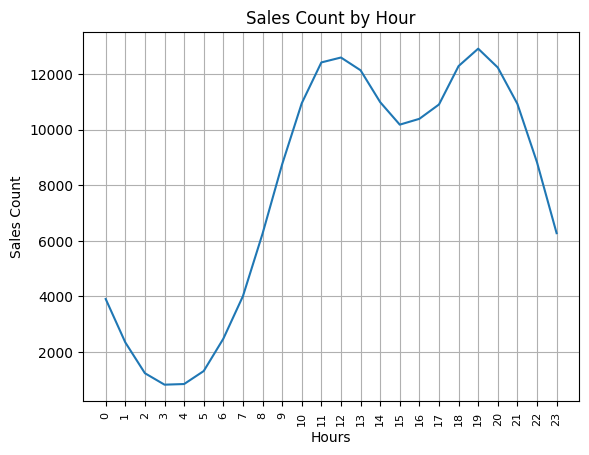

In [24]:
# Step 1: Group by 'Hours' and count the number of 'Sales'
sales_value_hours = df.groupBy('Hours').agg(F.count('Sales').alias('sales_count')).orderBy('Hours')

# Step 2: Collect the result as a list of rows
sales_data = sales_value_hours.collect()

# Step 3: Extract hours and sales values for plotting
hours = [row['Hours'] for row in sales_data]
sales_counts = [row['sales_count'] for row in sales_data]

# Step 4: Plot the results
plt.plot(hours, sales_counts)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales Count')
plt.title('Sales Count by Hour')
plt.show()

-----> We should display ads before 12h and 19h about 30 minutes

### 3.4. What products are most often sold together?

In [25]:
# Chuyển đổi kiểu dữ liệu của các cột
df = df.withColumn('Quantity Ordered', df['Quantity Ordered'].cast(IntegerType()))
df = df.withColumn('Price Each', df['Price Each'].cast(FloatType()))

# Nhóm theo 'Order ID' và tạo danh sách sản phẩm (sử dụng collect_set thay cho collect_list nếu cần loại bỏ trùng lặp)
grouped = df.groupBy('Order ID').agg(F.collect_set('Product').alias('Products'))

# Lọc các 'Order ID' có nhiều hơn một sản phẩm
filtered = grouped.withColumn('ProductCount', F.size('Products')).filter('ProductCount > 1')

# Bỏ cột ProductCount và hiển thị kết quả
result = filtered.drop('ProductCount')

# Hiển thị kết quả
result.show(truncate=False)

+--------+------------------------------------------------------------+
|Order ID|Products                                                    |
+--------+------------------------------------------------------------+
|141275  |[USB-C Charging Cable, Wired Headphones]                    |
|141384  |[USB-C Charging Cable, Google Phone]                        |
|141550  |[Apple Airpods Headphones, iPhone, Wired Headphones]        |
|141789  |[USB-C Charging Cable, Google Phone]                        |
|141965  |[Wired Headphones, Google Phone]                            |
|141970  |[Apple Airpods Headphones, Lightning Charging Cable]        |
|142037  |[Apple Airpods Headphones, iPhone]                          |
|142039  |[USB-C Charging Cable, Google Phone]                        |
|142085  |[Lightning Charging Cable, iPhone]                          |
|142128  |[Wired Headphones, Google Phone, Bose SoundSport Headphones]|
|142145  |[Apple Airpods Headphones, USB-C Charging Cable]      

### 3.5. What product sold the most? Why do you think it sold the most?

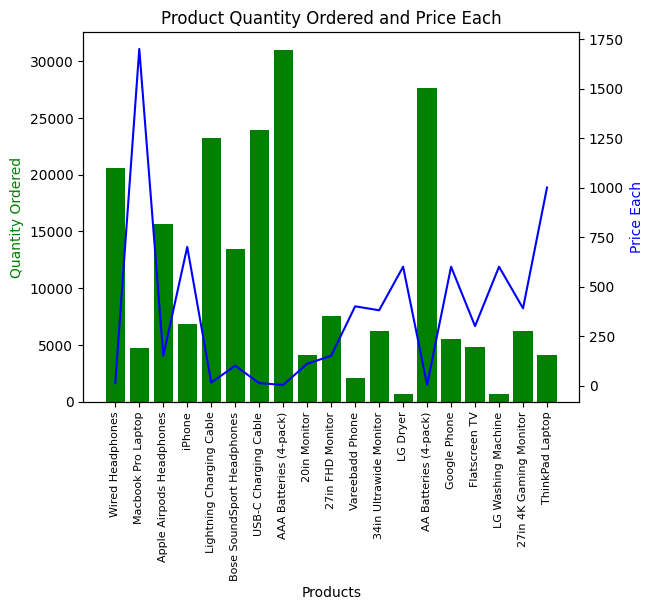

In [26]:
# Step 1: Calculate total quantity ordered by product
total_quantity_df = df.groupBy("Product").agg(F.sum("Quantity Ordered").alias("Total Quantity Ordered"))

# Step 2: Calculate average price by product
average_price_df = df.groupBy("Product").agg(F.mean("Price Each").alias("Average Price"))

# Step 3: Join the two DataFrames
result_df = total_quantity_df.join(average_price_df, on="Product")

# Step 4: Collect data for plotting
result = result_df.collect()
products_ls = [row.Product for row in result]
y1 = [row['Total Quantity Ordered'] for row in result]
y2 = [row['Average Price'] for row in result]

# Step 5: Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products_ls, y1, color='g')
ax2.plot(products_ls, y2, 'b-')

# Set ticks and labels
ax1.set_xticks(range(len(products_ls)))  # Set tick positions
ax1.set_xticklabels(products_ls, rotation=90, size=8)  # Set tick labels

# Set labels for the axes
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

# Set a title for clarity
plt.title('Product Quantity Ordered and Price Each')

# Show the plot
plt.show()